In [73]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [75]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

39.23644875725 -105.3980891929507
-66.84366860697716 -151.389333683136
-6.811015174582693 -106.89044586375182
-20.116503867210028 -146.26612061408127
7.156527562928318 129.89720108723975
-21.51451682999638 -153.52031734760394
22.13022098819286 -26.054402198530852
-81.22811482855698 -4.84504068693488
-29.408102399720697 -100.34623255501133
-67.16067403688606 -75.14519366836731
19.717485590571144 -2.110081357075785
-33.04882558500837 161.2020137479409
38.42765135776972 -154.14232799849003
6.054360706947264 42.428147833211455
15.879091397150702 -58.62603557978346
-8.941229293718848 83.40863628055962
-49.7095388773963 -53.590807704256605
43.933936604992596 -40.98427574413887
-88.57301136859247 1.6860161816167079
24.732972472478693 39.073461602318474
80.75241862842736 46.81179712827969
80.7583858153092 46.429944456760495
-31.15767442667073 40.149045163827566
53.317087006093914 -49.56161545377995
-53.08012380260974 13.683155650688036
-5.747357768024159 162.33263192080318
-25.22523536735025 1

-18.95604038085122 -175.60494155731934
0.48311130294707993 151.1707210121818
74.32631798981674 1.5256139437672687
17.116081315792584 166.0873728324927
22.209675595013778 92.42531840519416
-59.29506646473778 124.29302818449929
-62.38228375433461 -109.15616325099667
5.256986780858583 111.24710113813086
56.74842182933506 -159.17316183736273
-42.92737025324341 -52.50112446492547
-21.348783162157872 57.259160043582455
65.48298122409258 5.03933834714843
-28.009999962938736 119.95192919650981
17.717087748410776 153.82487864480765
71.3552065360524 0.806681397908136
-30.851776612277362 47.17350695519107
-54.92677118845713 129.728705059905
81.93343925470006 -128.5363320485103
-72.2086443392221 -163.09231829115527
25.269818177768045 -25.34172809664537
68.94453493481089 -157.07237666589762
-72.17731172926005 -0.9725806084476858
-12.611474596346852 -118.53246886942208
83.00604403990718 -2.7163057383345404
69.43286152500701 -127.36444980365138
-14.489220697708419 169.91698697315184
77.81269248950724

In [76]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [77]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [78]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [79]:
import requests
requests.__version__

'2.25.1'

In [80]:
# Import the API key.
from config import weather_api_key

In [81]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a22f88d5ece10e7f219cdebaffffc5e


In [82]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a22f88d5ece10e7f219cdebaffffc5e&q=Boston


In [83]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [84]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vestmannaeyjar
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | beringovskiy
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | olafsvik
Processing Record 12 of Set 1 | caceres
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kailasahar
City not found. Skipping...
Processing Record 15 of Set 1 | wahran
City not found. Skipping...
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | waynesboro
Processing Record 21 of Set 1 

Processing Record 37 of Set 4 | avarua
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | abdanan
Processing Record 40 of Set 4 | erzin
Processing Record 41 of Set 4 | yerbogachen
Processing Record 42 of Set 4 | sur
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | hihifo
City not found. Skipping...
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | mawlaik
Processing Record 48 of Set 4 | latung
Processing Record 49 of Set 4 | madhupur
Processing Record 50 of Set 4 | nome
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | nago
Processing Record 3 of Set 5 | springdale
Processing Record 4 of Set 5 | kaihua
Processing Record 5 of Set 5 | dryden
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | levelland
Processing Record 8 of Set 5 | asau
Processing Record 9 of Set 5 | jinka
Processing Record 10 of Set 5 | s

Processing Record 24 of Set 8 | longlac
City not found. Skipping...
Processing Record 25 of Set 8 | lensk
Processing Record 26 of Set 8 | biskamzha
Processing Record 27 of Set 8 | fairview
Processing Record 28 of Set 8 | kieta
Processing Record 29 of Set 8 | kaiwaka
Processing Record 30 of Set 8 | guerrero negro
Processing Record 31 of Set 8 | santa fe
Processing Record 32 of Set 8 | visby
Processing Record 33 of Set 8 | lasa
Processing Record 34 of Set 8 | coracora
Processing Record 35 of Set 8 | umba
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | rovaniemi
Processing Record 38 of Set 8 | nizwa
Processing Record 39 of Set 8 | davila
Processing Record 40 of Set 8 | teguldet
Processing Record 41 of Set 8 | bubaque
Processing Record 42 of Set 8 | mahebourg
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | puqi
Processing Record 45 of Set 8 | chipiona
Processing Record 46 of Set 8 | grants pass
Processing Record 47 of Set 8 | belaya kholu

Processing Record 17 of Set 12 | belaya gora
Processing Record 18 of Set 12 | saint-louis
Processing Record 19 of Set 12 | aykhal
Processing Record 20 of Set 12 | dawei
Processing Record 21 of Set 12 | tambura
Processing Record 22 of Set 12 | rantauprapat
Processing Record 23 of Set 12 | marabba
Processing Record 24 of Set 12 | la mana
Processing Record 25 of Set 12 | tungor
Processing Record 26 of Set 12 | cacule
Processing Record 27 of Set 12 | coruripe
Processing Record 28 of Set 12 | nishihara
Processing Record 29 of Set 12 | soc trang
Processing Record 30 of Set 12 | zelenoborsk
Processing Record 31 of Set 12 | marienburg
Processing Record 32 of Set 12 | jaciara
Processing Record 33 of Set 12 | uribia
Processing Record 34 of Set 12 | khandyga
Processing Record 35 of Set 12 | rosarito
Processing Record 36 of Set 12 | sambava
Processing Record 37 of Set 12 | paarl
Processing Record 38 of Set 12 | maravilha
Processing Record 39 of Set 12 | peabiru
Processing Record 40 of Set 12 | pan

In [85]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vestmannaeyjar,63.4427,-20.2734,33.66,58,100,7.18,IS,2021-11-27 07:27:34
1,Punta Arenas,-53.1500,-70.9167,41.11,81,75,6.91,CL,2021-11-27 07:23:55
2,Sao Filipe,14.8961,-24.4956,76.91,75,3,10.58,CV,2021-11-27 07:27:34
3,Beringovskiy,63.0500,179.3167,1.62,97,100,10.49,RU,2021-11-27 07:27:35
4,Faanui,-16.4833,-151.7500,81.63,68,12,19.35,PF,2021-11-27 07:27:35
5,Vaini,-21.2000,-175.2000,78.96,94,75,3.44,TO,2021-11-27 07:27:36
6,Puerto Ayora,-0.7393,-90.3518,68.58,83,54,9.01,EC,2021-11-27 07:27:36
7,Castro,-24.7911,-50.0119,57.45,96,52,4.34,BR,2021-11-27 07:27:36
8,Rikitea,-23.1203,-134.9692,75.96,76,22,15.08,PF,2021-11-27 07:23:28
9,Jamestown,42.0970,-79.2353,27.99,74,90,12.66,US,2021-11-27 07:25:43


In [86]:
#Reorder the column orders
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [87]:
city_data_df = city_data_df[new_column_order]

In [88]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2021-11-27 07:27:34,63.4427,-20.2734,33.66,58,100,7.18
1,Punta Arenas,CL,2021-11-27 07:23:55,-53.1500,-70.9167,41.11,81,75,6.91
2,Sao Filipe,CV,2021-11-27 07:27:34,14.8961,-24.4956,76.91,75,3,10.58
3,Beringovskiy,RU,2021-11-27 07:27:35,63.0500,179.3167,1.62,97,100,10.49
4,Faanui,PF,2021-11-27 07:27:35,-16.4833,-151.7500,81.63,68,12,19.35
...,...,...,...,...,...,...,...,...,...
559,Gazanjyk,TM,2021-11-27 07:31:34,39.2446,55.5154,50.52,38,100,9.69
560,Whitehorse,CA,2021-11-27 07:28:51,60.7161,-135.0538,9.37,85,40,0.00
561,Kalmar,SE,2021-11-27 07:31:35,56.6616,16.3616,33.73,100,100,3.44
562,Aliwal North,ZA,2021-11-27 07:31:35,-30.6937,26.7114,65.35,67,100,28.63


In [89]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [90]:
# Extract relevant fields from the DataFrame for Plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

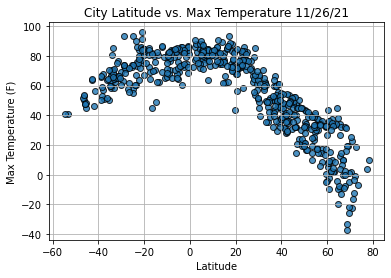

In [91]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolors="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the Figure.
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

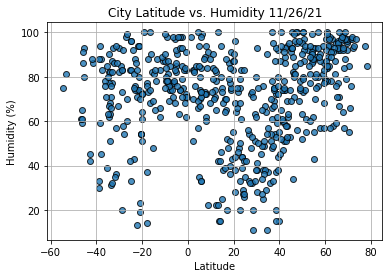

In [92]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

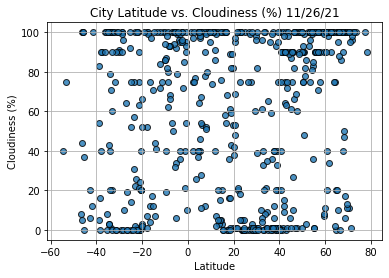

In [93]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

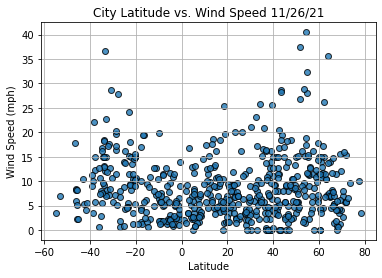

In [94]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [95]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [96]:
index13 = city_data_df.loc[13]
index13

City                     Lorengau
Country                        PG
Date          2021-11-27 07:27:39
Lat                       -2.0226
Lng                      147.2712
Max Temp                    83.12
Humidity                       75
Cloudiness                     72
Wind Speed                   2.42
Name: 13, dtype: object

In [97]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vestmannaeyjar,IS,2021-11-27 07:27:34,63.4427,-20.2734,33.66,58,100,7.18
2,Sao Filipe,CV,2021-11-27 07:27:34,14.8961,-24.4956,76.91,75,3,10.58
3,Beringovskiy,RU,2021-11-27 07:27:35,63.0500,179.3167,1.62,97,100,10.49
9,Jamestown,US,2021-11-27 07:25:43,42.0970,-79.2353,27.99,74,90,12.66
10,Olafsvik,IS,2021-11-27 07:27:37,64.8945,-23.7142,38.35,95,100,13.98


In [98]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

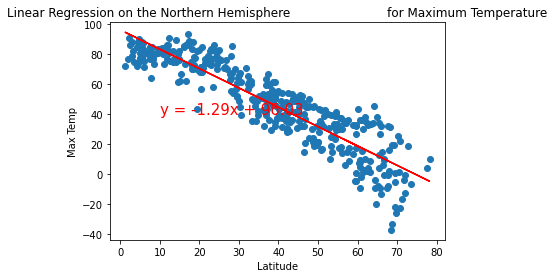

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

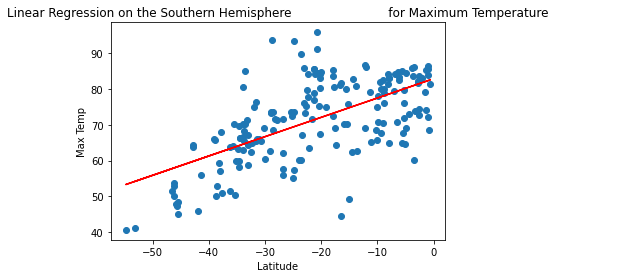

In [100]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

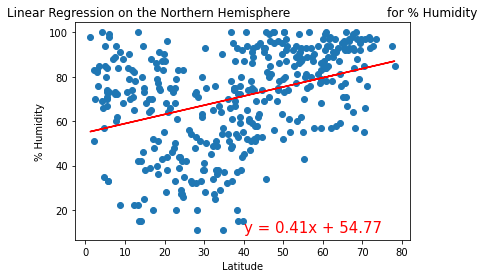

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

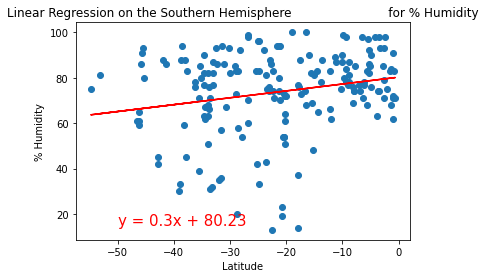

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

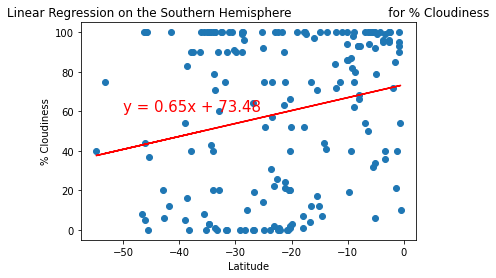

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


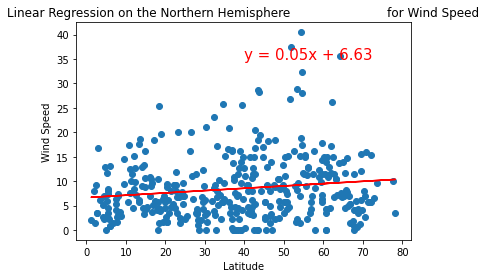

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


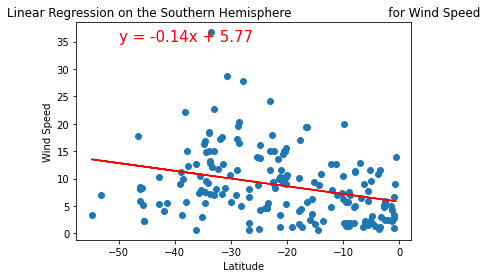

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))